### wow subreddit sentiment

In [1]:
!pip install textblob

import pandas as pd
import matplotlib.pyplot as plt
import nltk
import requests
import time

from datetime import datetime, timedelta
from ipywidgets import FloatProgress
from IPython.display import display
from pylab import rcParams
from textblob import TextBlob

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

# keep plots consistent
rcParams['figure.figsize'] = 50, 20
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['axes.facecolor'] = 'ffffff'

[nltk_data] Downloading package punkt to /Users/wrzr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wrzr/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /Users/wrzr/nltk_data...
[nltk_data]   Package brown is already up-to-date!


### helper functions

In [6]:
def get_day_df(i):
    """
    get dataframe
    """
    
    day_end = i
    day_start = day_end + 1
        
    submitstr = "https://apiv2.pushshift.io/reddit/submission/search/" \
        "?subreddit={}" \
        "&limit=1000" \
        "&fields=selftext" \
        "&before={}d" \
        "&after={}d".format("wow", day_end, day_start)
        
    r = requests.get(submitstr)
    json_data = r.json()
            
    df = pd.DataFrame(json_data['data'])
    df = df[df["selftext"].str.len() > 10]
        
    return df

def get_avg_polarity(df_txt):
    """
    get average sentiment analysis scores for polarity/subjectivity
    """
    
    avg_pol, avg_sub = [], []
    
    for j in range(df_txt.shape[0]):
    
        text = df_txt.iloc[j]["selftext"]
        blob = TextBlob(text)
        
        avg_pol.append(blob.sentiment.polarity)
        avg_sub.append(blob.sentiment.subjectivity)
    
    return sum(avg_pol) / float(len(avg_pol)), sum(avg_sub) / float(len(avg_sub))

### get avg sentiment for last x days

In [16]:
all_pol, all_sub = [], []

max_days = 500
f = FloatProgress(min=0, max=max_days)
display(f)

for i in range(max_days):
    f.value = i
    
    df = get_day_df(i)
    avg_pol, avg_sub = get_avg_polarity(df)
    
    all_pol.append(avg_pol)
    all_sub.append(avg_sub)


FloatProgress(value=0.0, max=500.0)

In [26]:
with open("all_pol.txt", "w") as f:
    f.write(str(all_pol))
    
with open("all_sub.txt", "w") as f:
    f.write(str(all_sub))

### plots

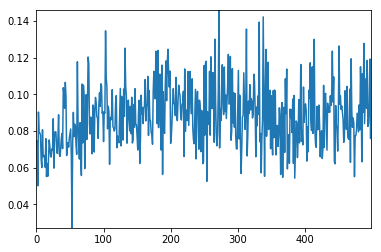

In [23]:
# sentiment
plt.plot(all_pol[::-1])

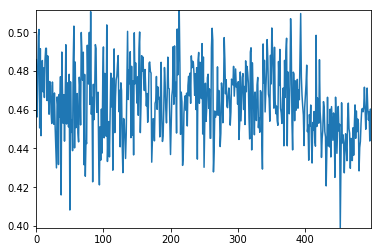

In [22]:
# subjectivity
plt.plot(all_sub[::-1])